In [ ]:
!pip install diffusers torch accelerate
!pip install --upgrade diffusers
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 8.7 MB/s eta 0:00:00


100%|██████████| 20/20 [00:07<00:00,  2.55it/s]


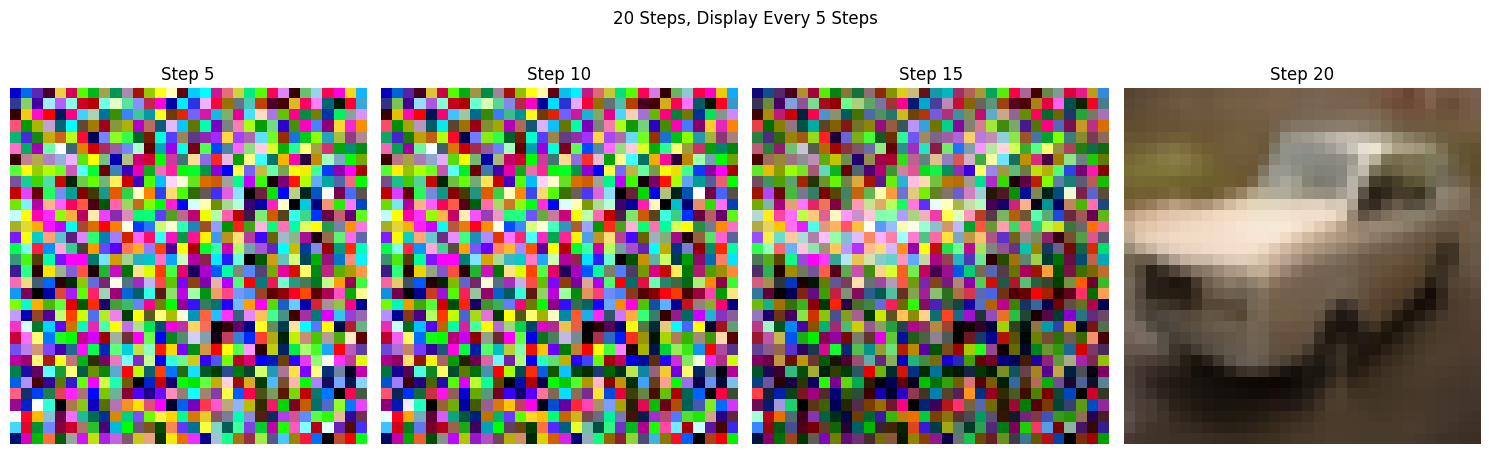

100%|██████████| 50/50 [00:19<00:00,  2.60it/s]


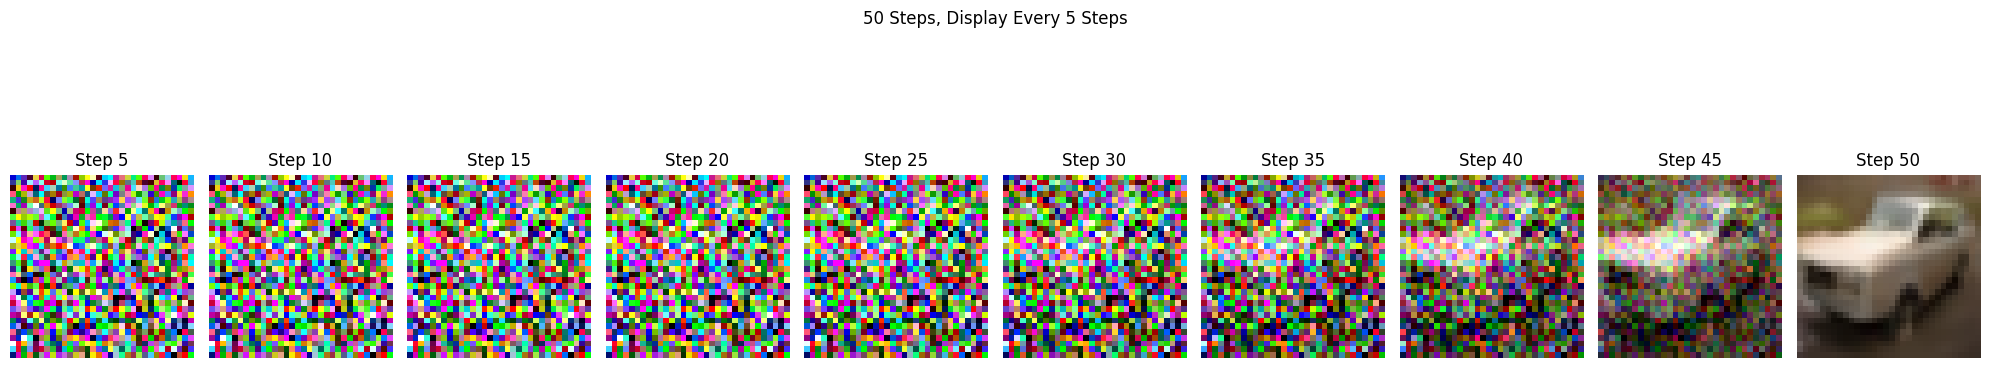

100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


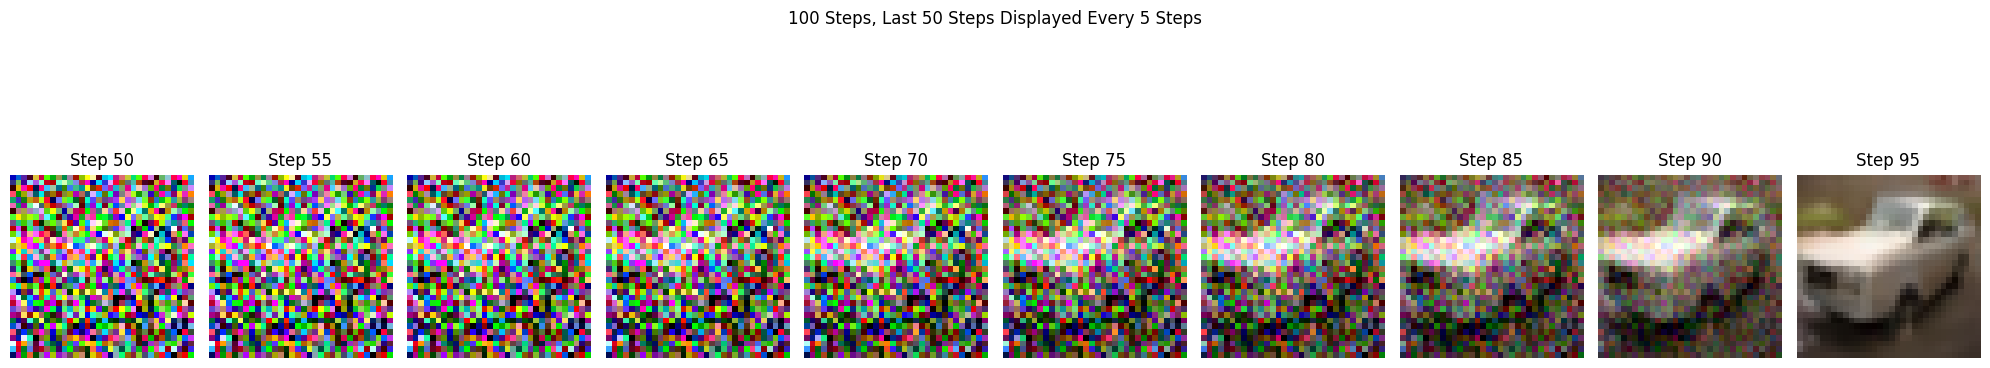

100%|██████████| 200/200 [01:16<00:00,  2.60it/s]


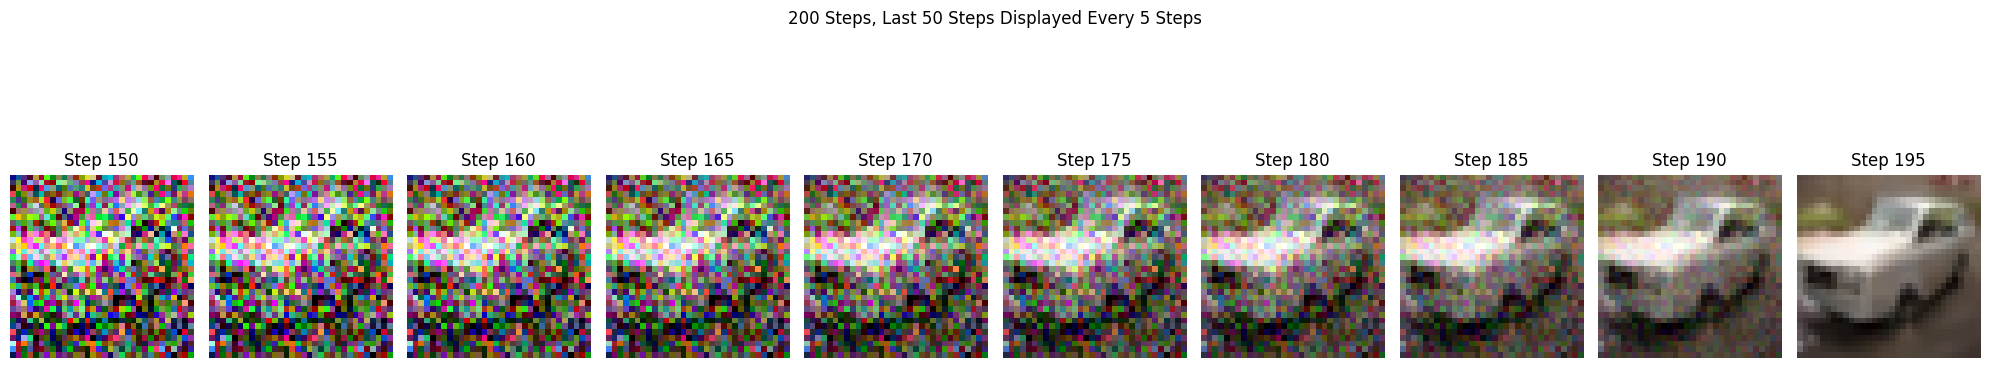

In [28]:
from diffusers import DDIMScheduler, UNet2DModel
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from PIL import Image

repo_id = "google/ddpm-cifar10-32"
model = UNet2DModel.from_pretrained(repo_id)
torch.manual_seed(0)

def generate_images(num_inference_steps, capture_from=None):
    ddim_scheduler = DDIMScheduler.from_config(repo_id)
    ddim_scheduler.set_timesteps(num_inference_steps=num_inference_steps)
    torch.manual_seed(0)

    noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
    sample = noisy_sample
    images = []

    for i, t in enumerate(tqdm.tqdm(ddim_scheduler.timesteps)):
        with torch.no_grad():
            residual = model(sample, t).sample
        sample = ddim_scheduler.step(residual, t, sample).prev_sample

        if (capture_from is None and (i + 1) % 5 == 0) or (capture_from is not None and i >= capture_from and (i + 1) % 5 == 0):
            sample_image = (sample.squeeze().cpu().numpy().transpose(1, 2, 0) + 1.0) * 127.5
            sample_image = np.clip(sample_image, 0, 255).astype(np.uint8)
            images.append(Image.fromarray(sample_image))

    return images

images_20 = generate_images(num_inference_steps=20)
fig, axes = plt.subplots(1, len(images_20), figsize=(15, 5))
for idx, img in enumerate(images_20):
    ax = axes[idx]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Step {(idx + 1) * 5}")
plt.suptitle("20 Steps, Display Every 5 Steps")
plt.tight_layout()
plt.show()

images_50 = generate_images(num_inference_steps=50)
fig, axes = plt.subplots(1, len(images_50), figsize=(20, 5))
for idx, img in enumerate(images_50):
    ax = axes[idx]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Step {(idx + 1) * 5}")
plt.suptitle("50 Steps, Display Every 5 Steps")
plt.tight_layout()
plt.show()

images_100 = generate_images(num_inference_steps=100, capture_from=50)
fig, axes = plt.subplots(1, len(images_100), figsize=(20, 5))
for idx, img in enumerate(images_100):
    ax = axes[idx]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Step {50 + (idx * 5)}")
plt.suptitle("100 Steps, Last 50 Steps Displayed Every 5 Steps")
plt.tight_layout()
plt.show()

images_200 = generate_images(num_inference_steps=200, capture_from=150)
fig, axes = plt.subplots(1, len(images_200), figsize=(20, 5))
for idx, img in enumerate(images_200):
    ax = axes[idx]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Step {150 + (idx * 5)}")
plt.suptitle("200 Steps, Last 50 Steps Displayed Every 5 Steps")
plt.tight_layout()
plt.show()
